# **Avaliação de eficiência na leitura: uma abordagem baseada em PLN**

### **Instalação das dependências**

In [6]:
%pip install -r ../requirements.txt

     -------------------------------------- 568.2/568.2 MB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## **Imports**

In [31]:
import os
import pandas as pd
from nlpcloze import AvaliadorCloze

## **Avaliação de Teste Cloze**

### **Dataframe dos testes cloze**

In [32]:
df_cloze = pd.read_csv("../data/raw/dados-ctes_29-02-2024.csv", encoding='utf-8')
df_cloze.head()

,discente,ano,turma,texto,respostas,data,tempo_inicial,tempo_final
0,EST_001,9,B,Consumismo entre os jovens,"['como', 'de', 'atribuido', 'de', 'em', 'do', ...",29-02-2024,08:01,08:09
1,EST_002,7,B,Inseguranças no uso das redes sociais,"['melhora', 'Facilidade', 'todo', 'o', 'desgra...",29-02-2024,07:55,08:28
2,EST_003,7,A,Inseguranças no uso das redes sociais,"['tecnologia', '-', '-', 'o', 'dificuldade', '...",29-02-2024,08:03,08:25
3,EST_004,9,A,Consumismo entre os jovens,"['entre', 'a', 'exercida', 'de', 'aos', 'do', ...",29-02-2024,08:02,08:11
4,EST_005,9,A,Consumismo entre os jovens,"['como', 'de', 'jeito', 'de', 'de', 'de', 'soc...",29-02-2024,08:02,08:10


### **Aplicando a avaliação das lacunas**

In [9]:
# Inicializa avaliador
nlpcloze = AvaliadorCloze()

for texto in df_cloze['texto'].unique():
    gabarito = nlpcloze.get_gabarito(texto, '../data/textos.json')

    df_temp = df_cloze[df_cloze['texto'] == texto].copy()
    df_resultado = nlpcloze.processar_dataframe(df_temp, gabarito)
    
    df_resultado.to_csv(f"../data/processed/avaliacao-cloze_{df_temp['ano'].iloc[0]}-ano.csv", index=False, encoding='utf-8')

Carregando modelos...
✓ Modelo BERT carregado: PORTULAN/albertina-100m-portuguese-ptbr-encoder
✓ Modelo spaCy carregado: pt_core_news_lg


### **Analisando os resultados**

Carregando modelos...
✓ Modelo BERT carregado: PORTULAN/albertina-100m-portuguese-ptbr-encoder
✓ Modelo spaCy carregado: pt_core_news_lg
✓ Cache carregado: 716 embeddings


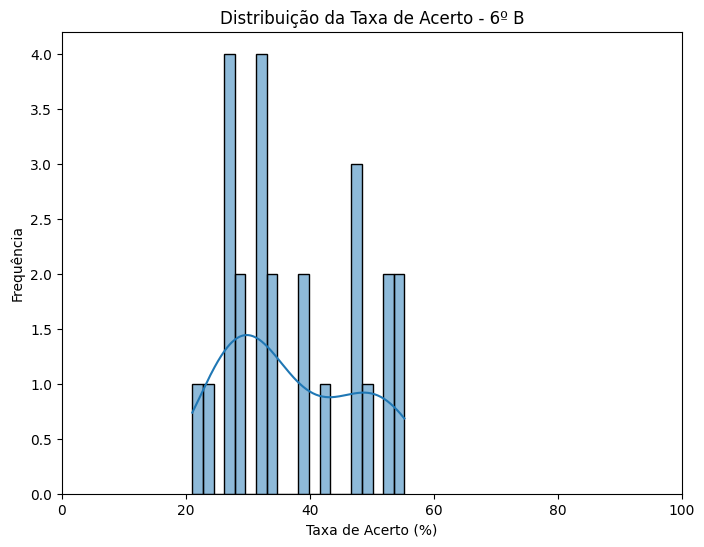

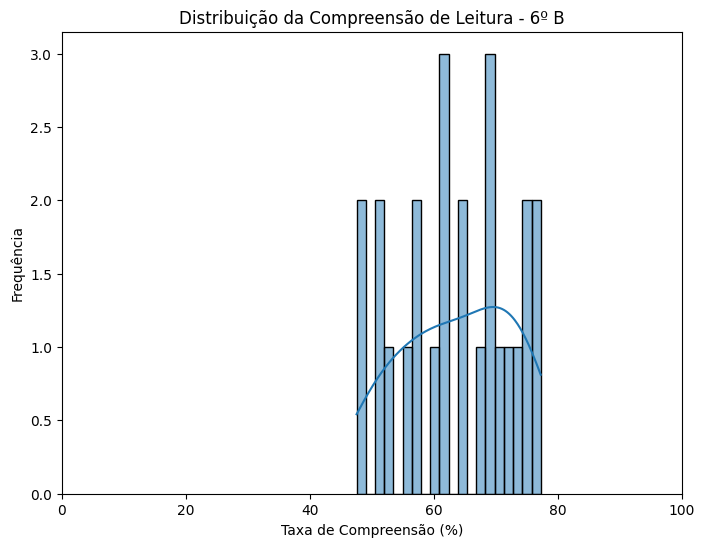

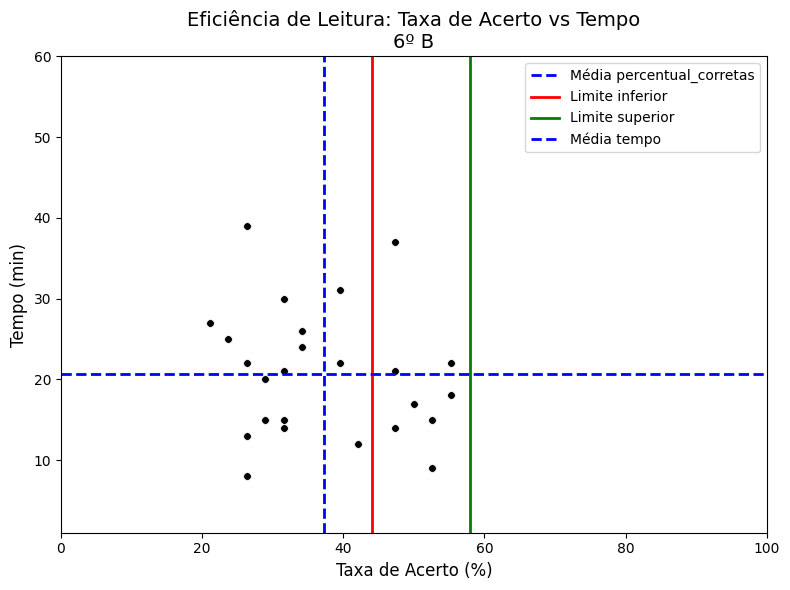

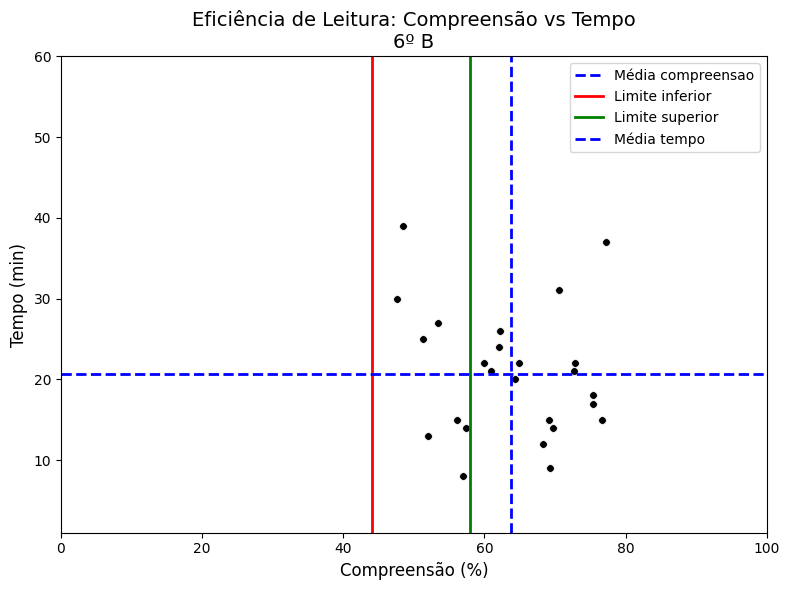

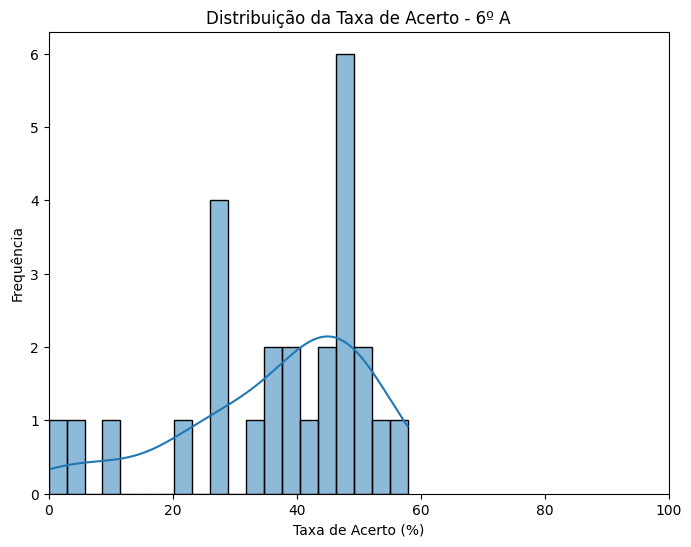

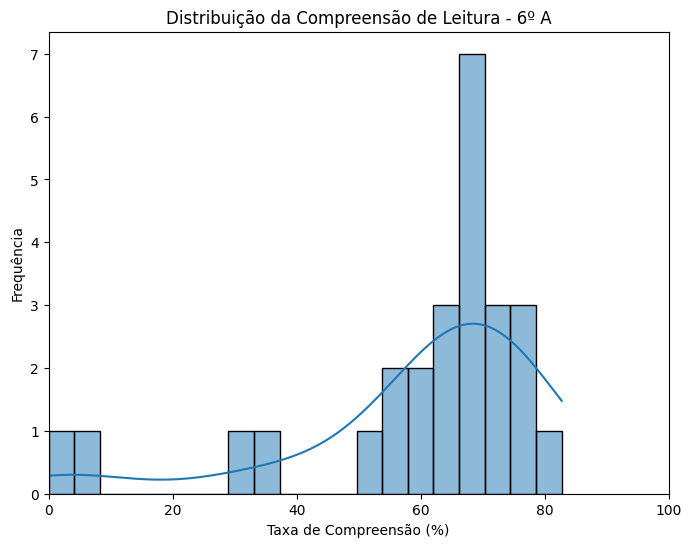

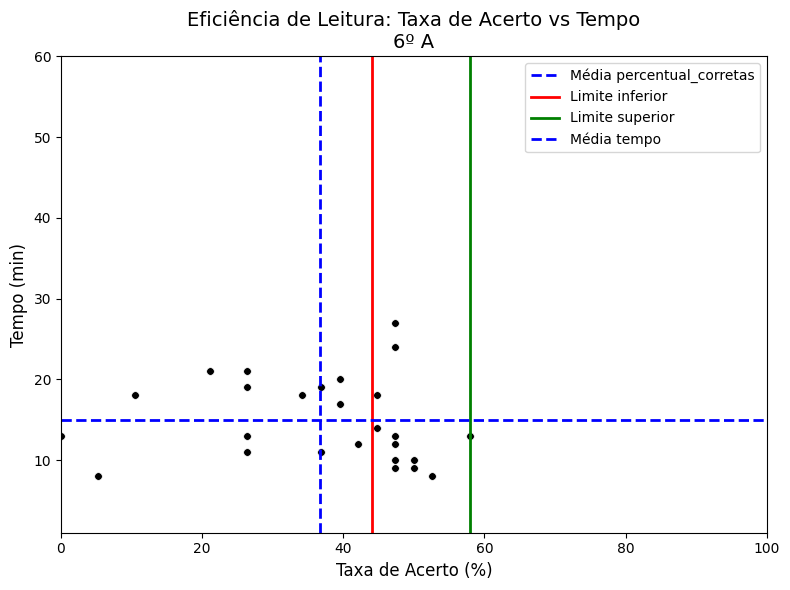

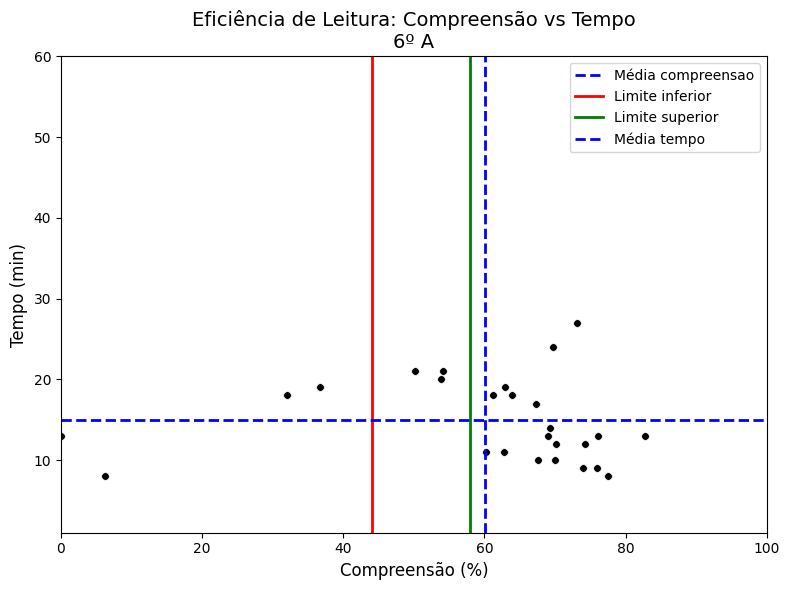

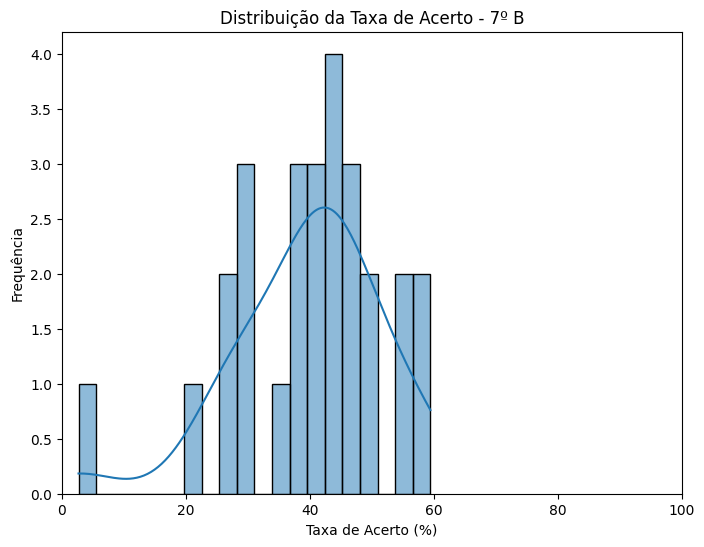

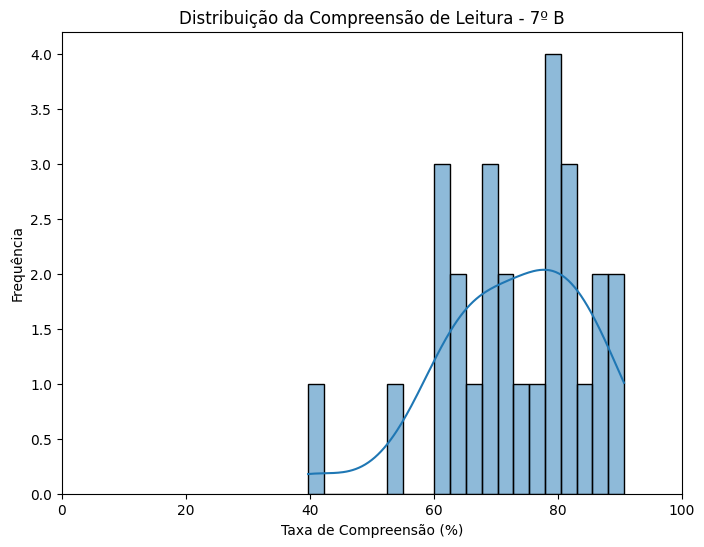

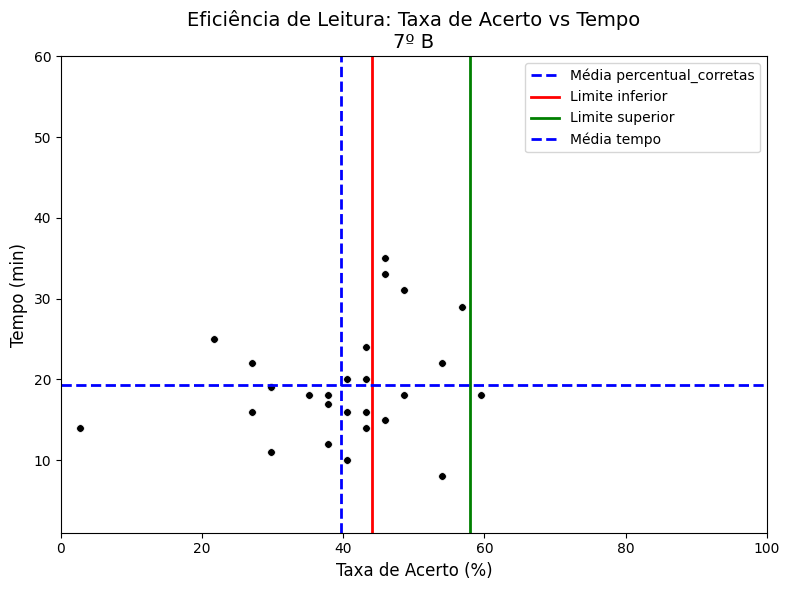

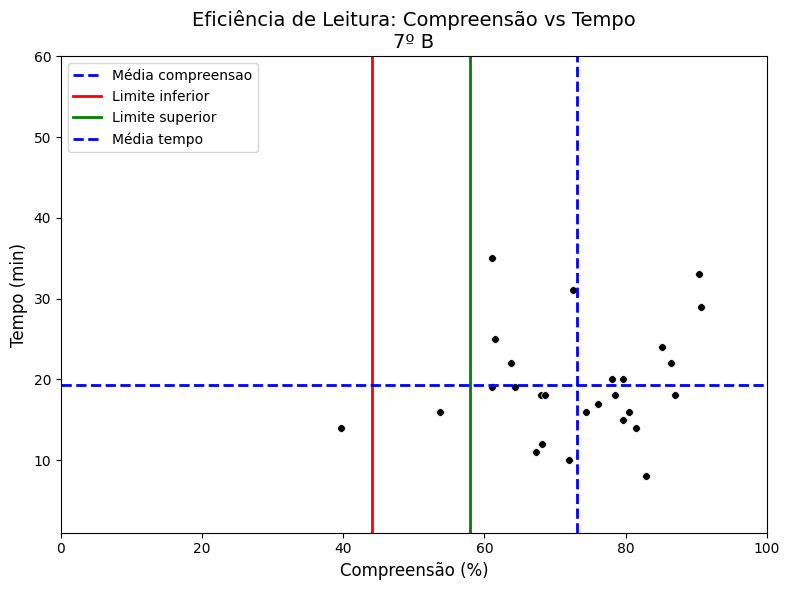

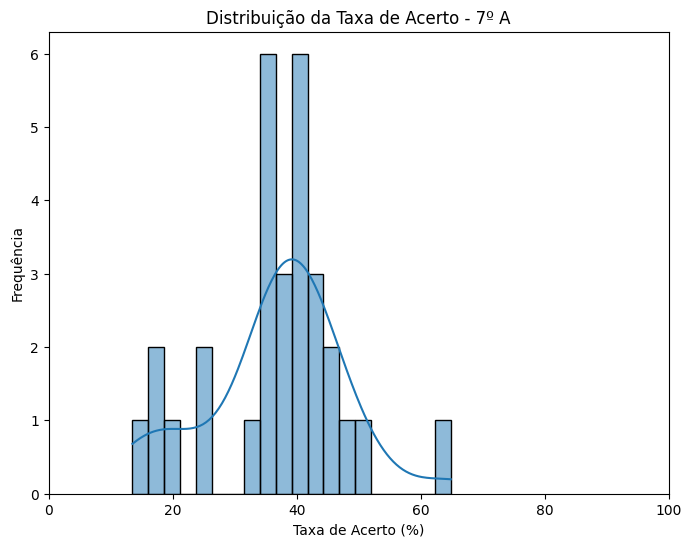

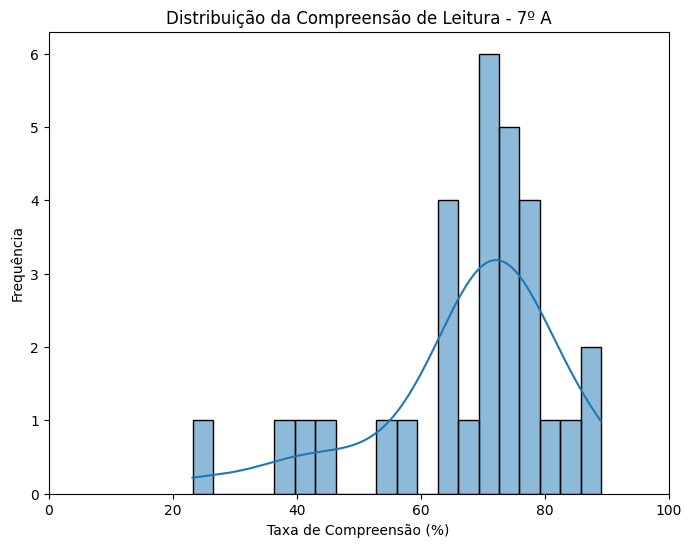

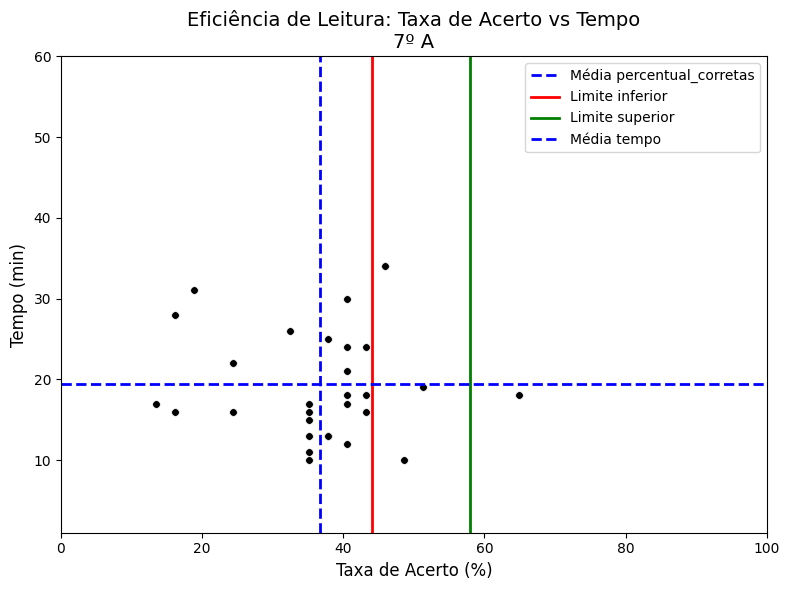

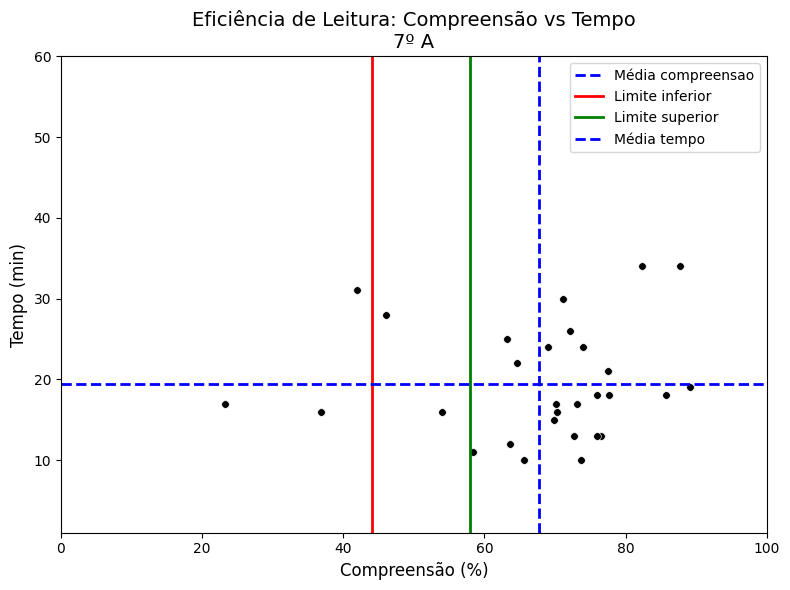

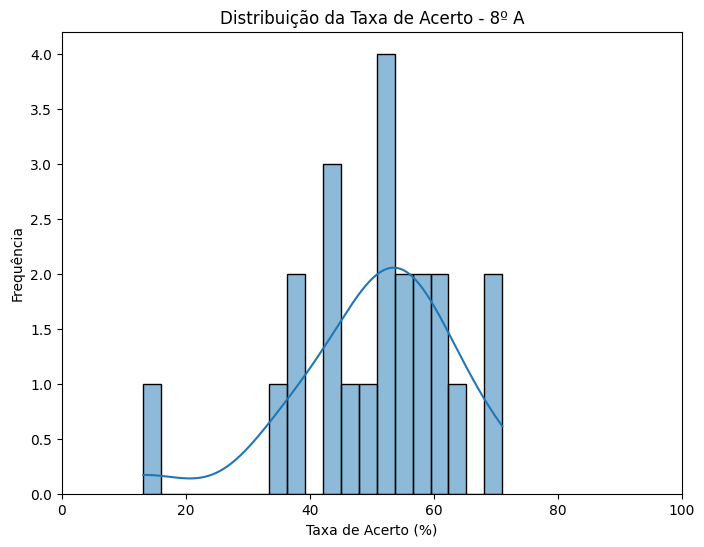

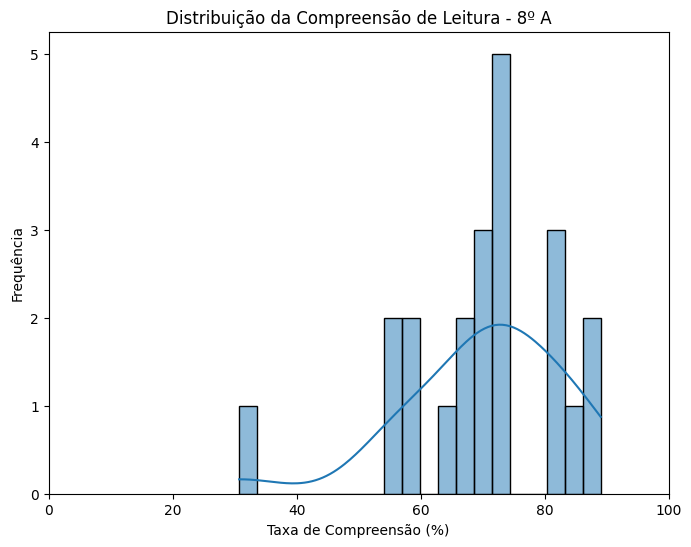

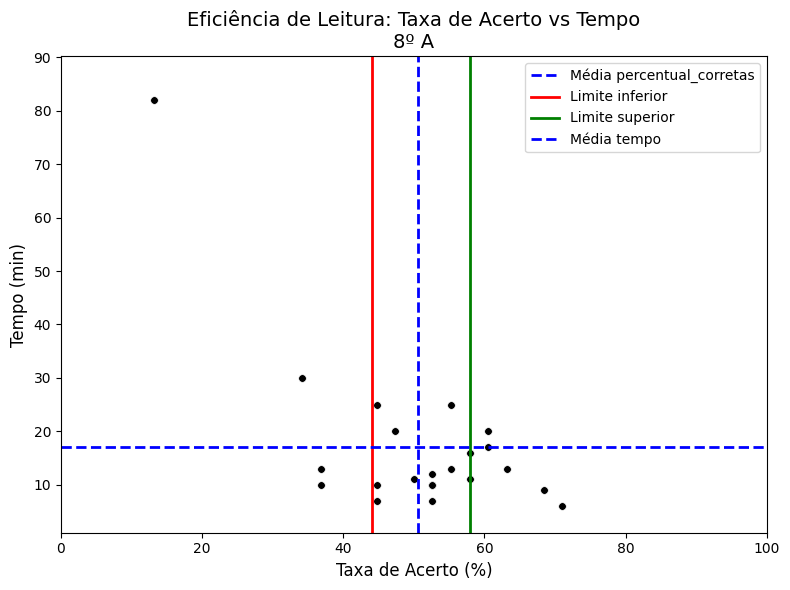

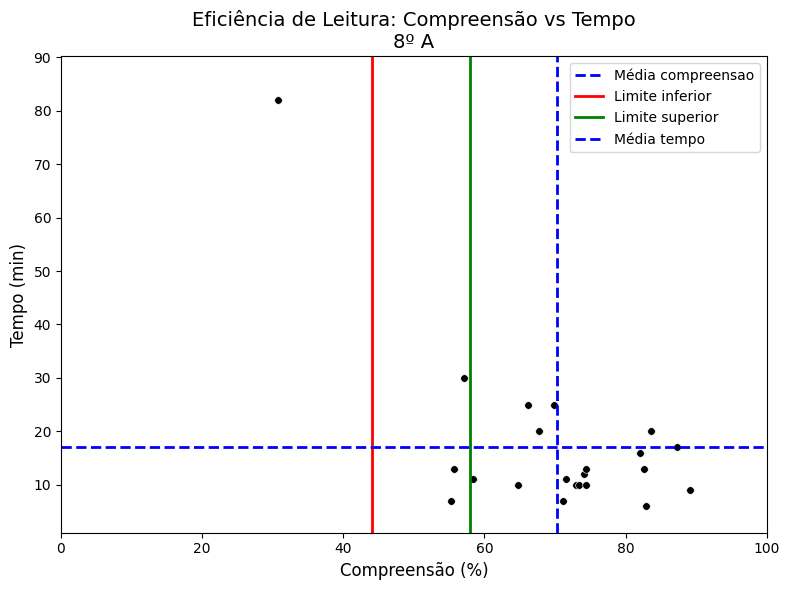

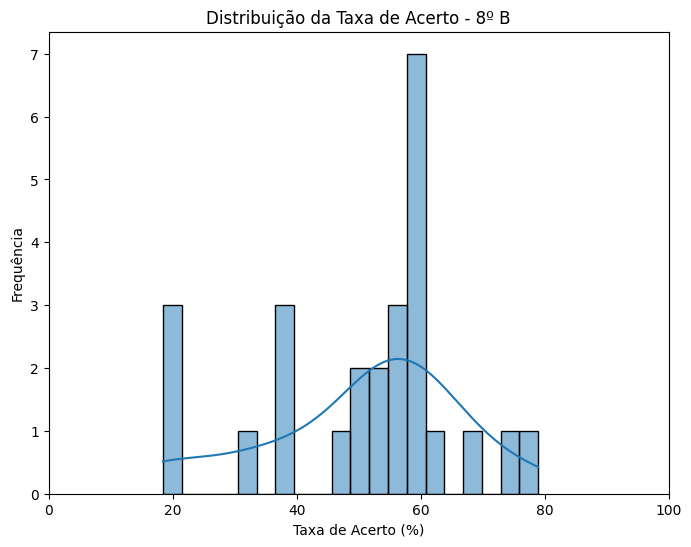

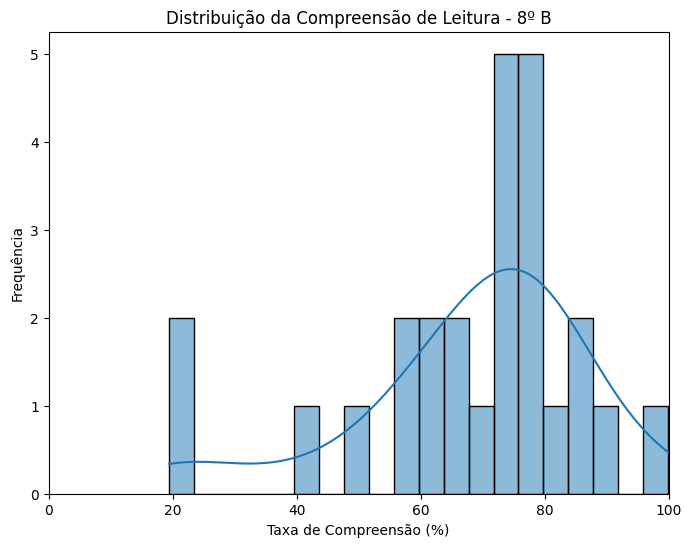

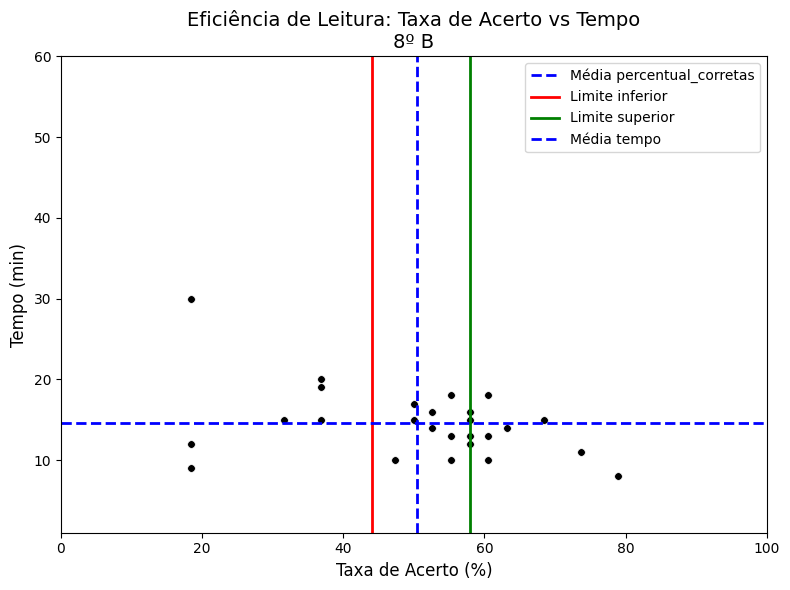

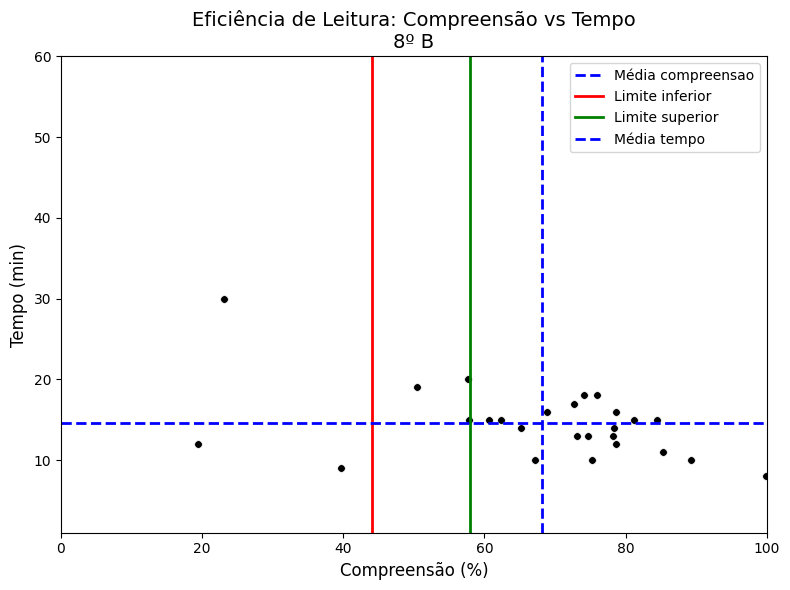

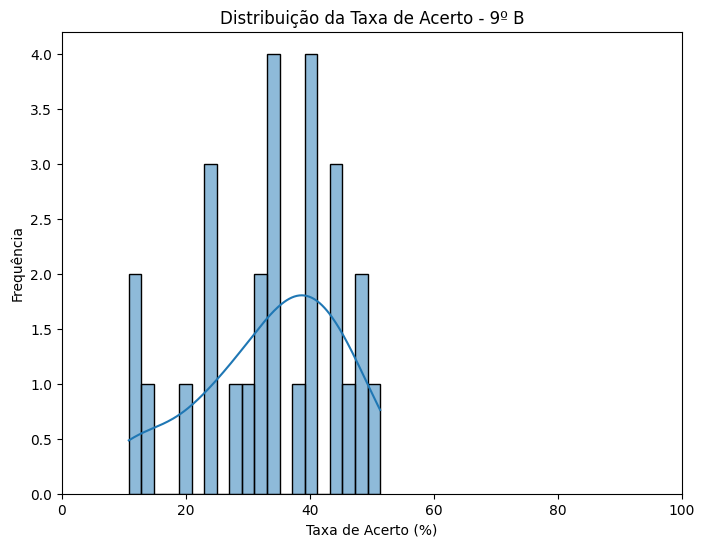

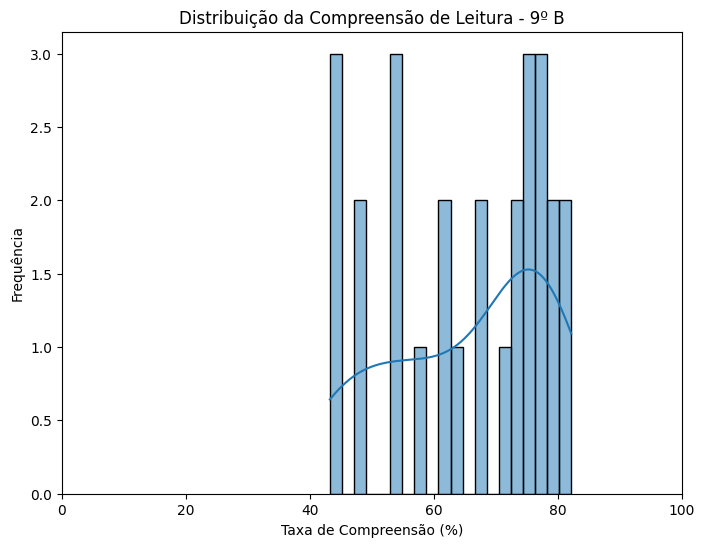

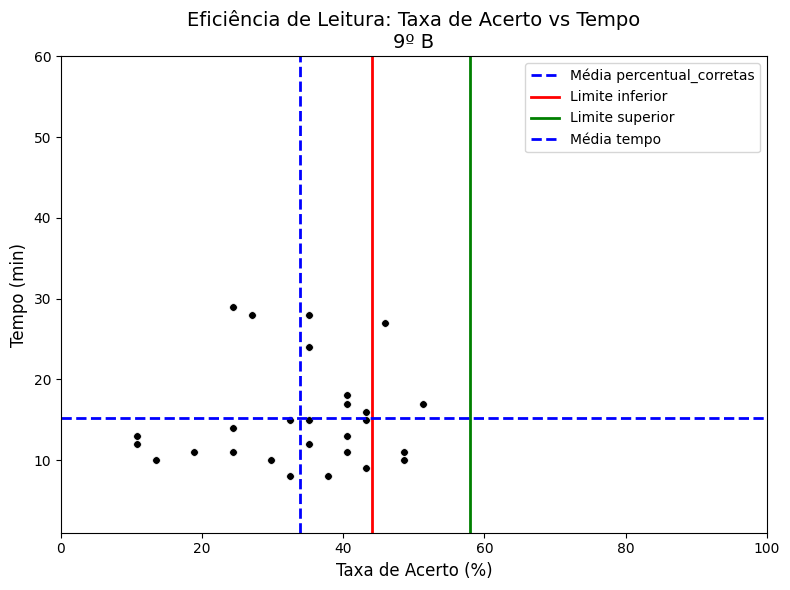

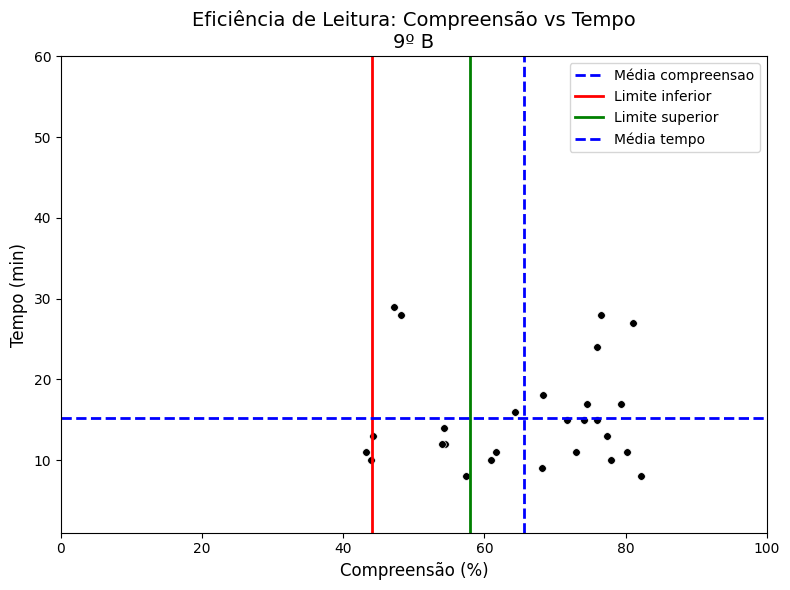

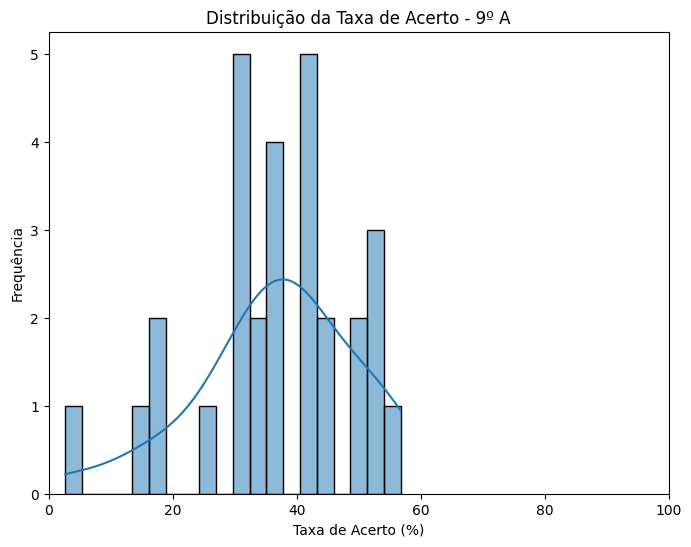

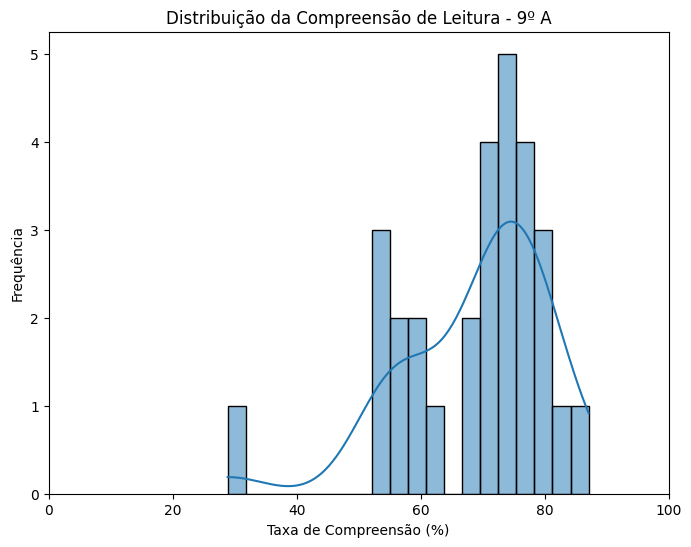

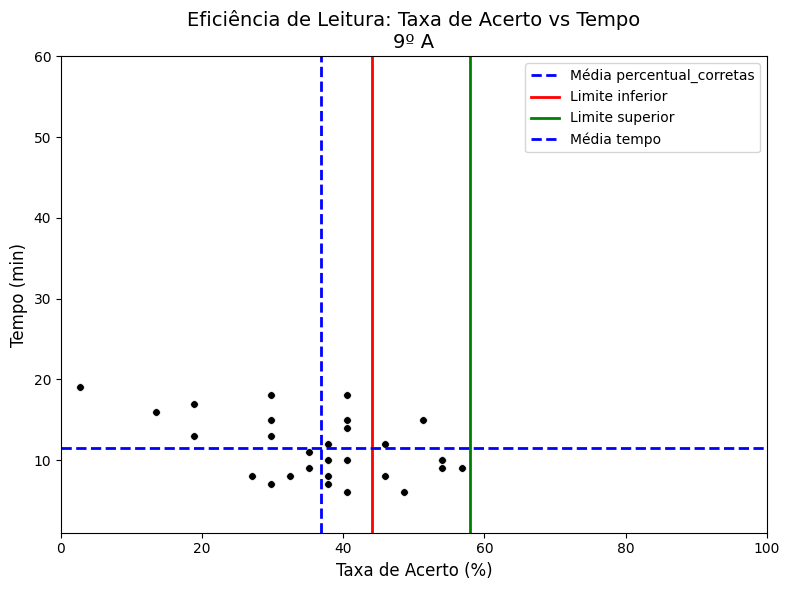

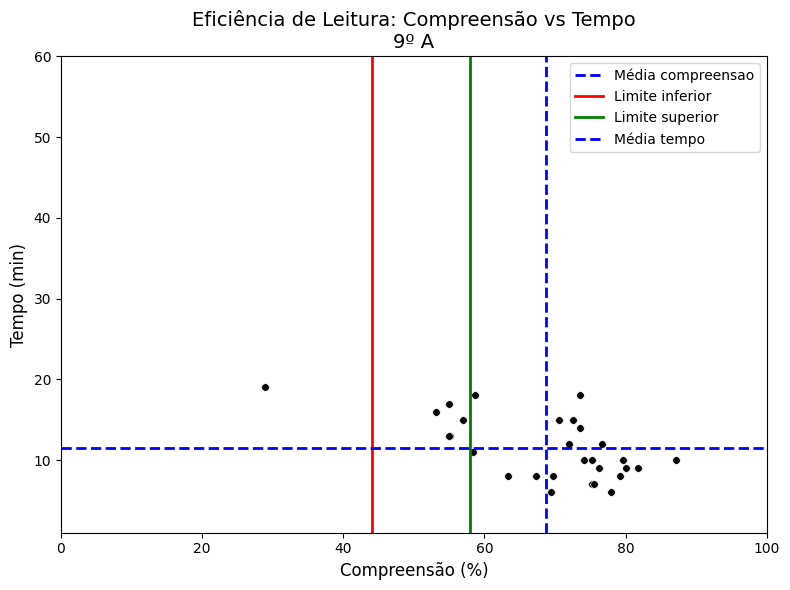

In [29]:
arquivos = os.listdir("../data/processed/")
nlpcloze = AvaliadorCloze()

for arquivo in arquivos:
    df = pd.read_csv(f"../data/processed/{arquivo}", encoding='utf-8')

    for turma in df['turma'].unique():
        df_turma = df[df['turma'] == turma]
        nlpcloze.plot_dist_respostas(df_turma, 
                                     tipo='percentual_corretas',
                                     output_dir='../docs/results')
        nlpcloze.plot_dist_respostas(df_turma,
                                     tipo='compreensao',
                                     output_dir='../docs/results')
        nlpcloze.plot_eficiencia_leitura(df_turma, 
                                     tipo='percentual_corretas',
                                     output_dir='../docs/results')
        nlpcloze.plot_eficiencia_leitura(df_turma,
                                     tipo='compreensao',
                                     output_dir='../docs/results')